In [ ]:
!pip install joblib

In [ ]:
import pandas as pd
import json
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score

In [ ]:
import csv
import numpy as np
from sklearn import linear_model
dataarr = []

with open('output.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        dataarr.append(row)

In [ ]:
print(dataarr)

[['7', '0', '54', '0'], ['4', '1', '56', '0'], ['7', '1', '53', '0'], ['7', '1', '53', '0'], ['16', '1', '44', '0'], ['15', '0', '46', '0'], ['18', '2', '41', '0'], ['25', '0', '36', '0'], ['0', '1', '60', '0'], ['0', '1', '60', '0'], ['0', '0', '61', '0'], ['0', '0', '61', '0'], ['4', '7', '50', '0'], ['2', '13', '46', '0'], ['5', '10', '46', '0'], ['5', '19', '37', '0'], ['4', '8', '49', '0'], ['6', '7', '48', '0'], ['2', '8', '51', '0'], ['4', '10', '47', '0'], ['23', '17', '21', '1'], ['24', '13', '24', '1'], ['24', '11', '26', '1'], ['24', '12', '25', '1'], ['46', '14', '1', '1'], ['51', '10', '0', '1'], ['46', '14', '1', '1'], ['46', '14', '1', '1'], ['2', '10', '49', '1'], ['2', '13', '46', '1'], ['2', '16', '43', '1'], ['2', '10', '49', '1'], ['55', '5', '1', '1'], ['56', '5', '0', '1'], ['52', '9', '0', '1'], ['56', '5', '0', '1'], ['5', '14', '42', '1'], ['5', '20', '36', '1'], ['4', '18', '39', '1'], ['2', '12', '47', '1'], ['32', '20', '9', '1'], ['26', '25', '10', '1'], ['

In [ ]:
values = []
status = []

i = 0
while (i < len(dataarr)):
  values.append([dataarr[i][0], dataarr[i][1], dataarr[i][2]])
  status.append(dataarr[i][3])
  i += 1

values = np.array(values)
status = np.array(status)

values = values.reshape(-1, 3)

print(values)
print(status)

[['7' '0' '54']
 ['4' '1' '56']
 ['7' '1' '53']
 ['7' '1' '53']
 ['16' '1' '44']
 ['15' '0' '46']
 ['18' '2' '41']
 ['25' '0' '36']
 ['0' '1' '60']
 ['0' '1' '60']
 ['0' '0' '61']
 ['0' '0' '61']
 ['4' '7' '50']
 ['2' '13' '46']
 ['5' '10' '46']
 ['5' '19' '37']
 ['4' '8' '49']
 ['6' '7' '48']
 ['2' '8' '51']
 ['4' '10' '47']
 ['23' '17' '21']
 ['24' '13' '24']
 ['24' '11' '26']
 ['24' '12' '25']
 ['46' '14' '1']
 ['51' '10' '0']
 ['46' '14' '1']
 ['46' '14' '1']
 ['2' '10' '49']
 ['2' '13' '46']
 ['2' '16' '43']
 ['2' '10' '49']
 ['55' '5' '1']
 ['56' '5' '0']
 ['52' '9' '0']
 ['56' '5' '0']
 ['5' '14' '42']
 ['5' '20' '36']
 ['4' '18' '39']
 ['2' '12' '47']
 ['32' '20' '9']
 ['26' '25' '10']
 ['29' '21' '11']
 ['29' '21' '11']
 ['58' '2' '1']
 ['54' '6' '1']
 ['58' '2' '1']
 ['58' '1' '2']
 ['39' '10' '12']
 ['40' '14' '7']
 ['44' '11' '6']
 ['61' '0' '0']
 ['61' '0' '0']
 ['61' '0' '0']
 ['61' '0' '0']
 ['59' '2' '0']
 ['59' '2' '0']
 ['59' '2' '0']
 ['60' '1' '0']
 ['54' '1' '6']
 

Max accuracy:  0.9885057471264368
Max f1 0.9887175617489269


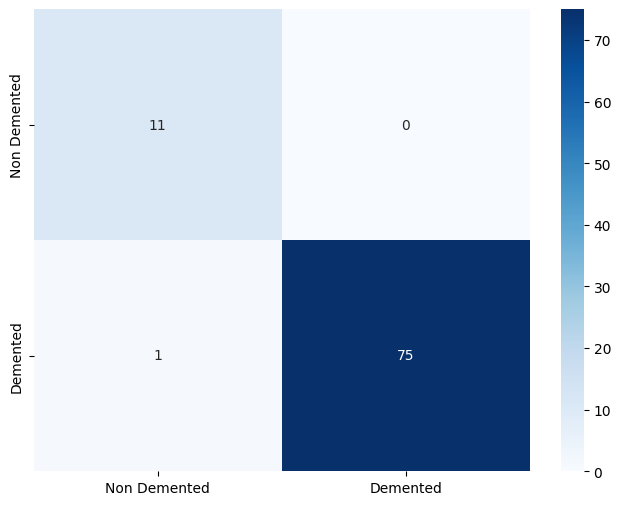

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import joblib
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

def trainrfclassifier():
    X = values
    y = status

    # clf = LogisticRegression()

    # clf.fit(X, y)
    # clf = RandomForestClassifier(max_depth=13, random_state=0)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm, index = ("Non Demented", "Demented"), columns=("Non Demented", "Demented"))

    recall = recall_score(y_test, y_pred, average="weighted")
    #print("Accuracy:", accuracy, "\t\tF1:", f1)
    return (accuracy, f1, precision, recall, rf, cm_df)

sum = 0
sum1 = 0
max = 0
max1 = 0
while True:
    tt = trainrfclassifier()
    sum += tt[0]
    sum1 += tt[1]
    if (max < tt[0]):
        max = tt[0]
        filename = 'random_forest_model' + str(tt[0]) + '.joblib'
        #joblib.dump(tt[4], filename)
        max1 = tt[1]
        cm_dfmax = tt[5]
        if (max > 0.98):
          break

print("Max accuracy: ",max)
print("Max f1", max1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dfmax, annot=True, fmt="d", cmap="Blues")

# import joblib
# joblib.dump(rf, 'thresholding_volume_classifier.sav')

import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
# display.plot()

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(rf,
#                    feature_names=iris.feature_names,
#                    class_names=iris.target_names,
#                    filled=True)

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# plt.figure(figsize=(80,20))
# #fig, axes = plt.subplots(nrows = 1,ncols = 1) # # ,
# _ = tree.plot_tree(rf.estimators_[0], feature_names=X_test, filled=True, fontsize=8.5) #, class_names=["Non Demented","Demented"], max_depth=7)


# plt.savefig("myimage.png", dpi=1200)
# plt.show()

# clf.predict(X[:2, :])

# clf.predict_proba(X[:2, :])

# clf.score(X, y)
#import joblib
#joblib.dump(rf, 'thresholding_volume_classifier.sav')

In [ ]:
cv_results = cross_validate(clf, values, status, cv=5, scoring={"AUC": "roc_auc",
                                                      "Balanced Accuracy": make_scorer(accuracy_score),
                                                      "F1 Score": make_scorer(f1_score)})
print(cv_results)

In [ ]:
print(cv_results)

sum_AUC = 0
AUC_arr = cv_results.get("test_AUC")

for el in AUC_arr:
    sum_AUC += el

avg_AUC = sum_AUC/len(AUC_arr)

print("Avg AUC",avg_AUC)
print("STD AUC",np.std(AUC_arr),"\n");


sum_BAL = 0
BAL_arr = cv_results.get("test_Balanced Accuracy")

for el in BAL_arr:
    sum_BAL += el

avg_BAL = sum_BAL/len(BAL_arr)

print("Avg ACCURACY",avg_BAL);
print("STD ACCURACY",np.std(BAL_arr),"\n");


sum_F1 = 0
F1_arr = cv_results.get("test_F1 Score")

for el in AUC_arr:
    sum_F1 += el

avg_F1 = sum_F1/len(F1_arr)

print("Avg F1",avg_F1)
print("STD F1",np.std(F1_arr),"\n");

In [ ]:
import matplotlib.pyplot as plt

import sklearn
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

X = values
y = status

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)

# _, ax = plt.subplots(figsize=(4, 3))
# DecisionBoundaryDisplay.from_estimator(
#     logreg,
#     X,
#     cmap=plt.cm.Paired,
#     ax=ax,
#     response_method="predict",
#     plot_method="pcolormesh",
#     shading="auto",
#     xlabel="Sepal length",
#     ylabel="Sepal width",
#     eps=0.5,
# )

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()